In [1]:
%load_ext autoreload
%autoreload 2

import nolearn.lasagne.visualize 

import collections
import cPickle as pickle
import lasagne
import mahotas as mh
import numpy as np
import os
import time

import mlproof as mlp

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
mlproof/tifffile.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [16]:
image, prob, mask, gold, rhoana = mlp.Util.read_section('/home/d/data/cylinder/', 75)

Loading z00000075.png


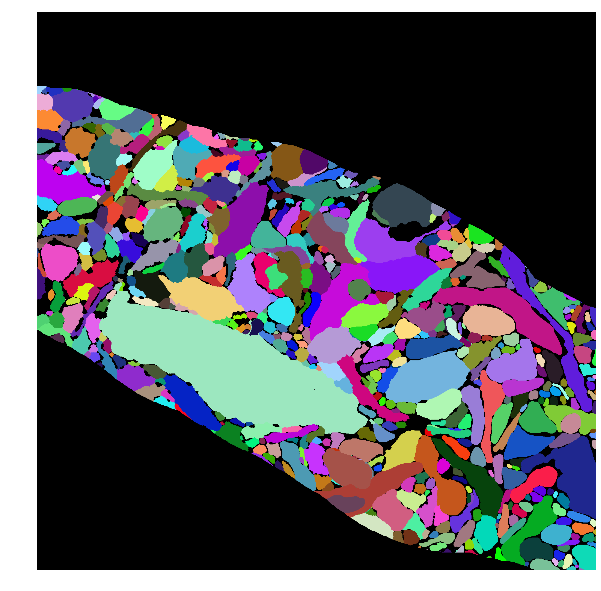

In [17]:
mlp.Util.view(gold, large=True, color=True)

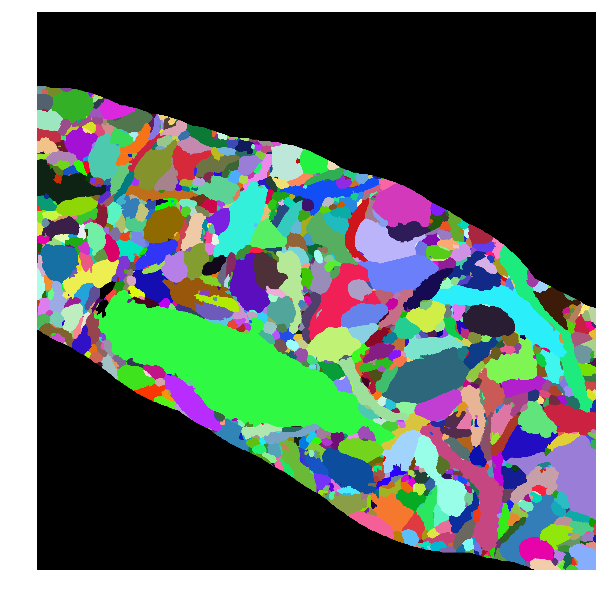

In [19]:
mlp.Util.view(rhoana, large=True, color=True)

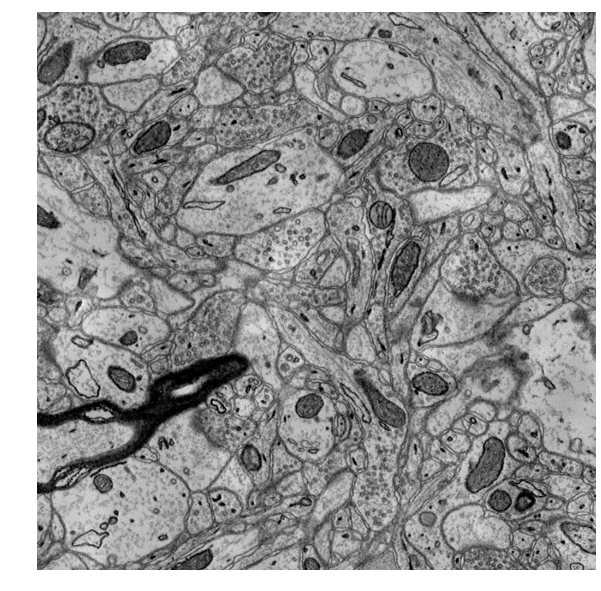

In [22]:
mlp.Util.view(image[1024:,1024:], large=True, color=False)

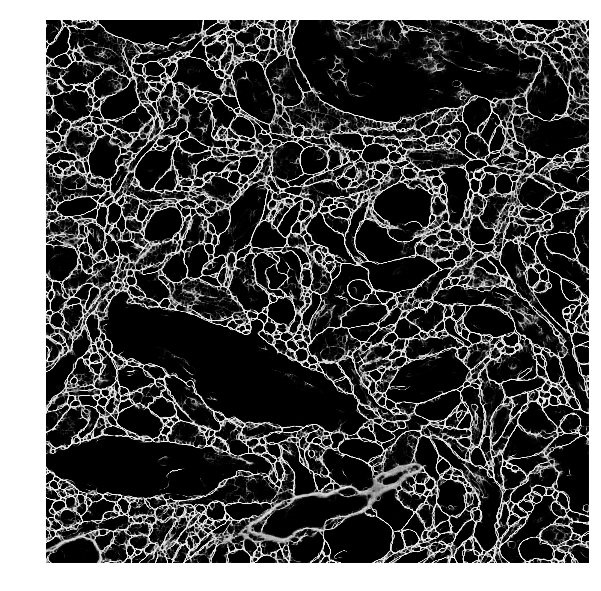

In [20]:
mlp.Util.view(prob, large=True, color=False)

In [29]:
ws = mlp.Legacy.random_watershed(mlp.Legacy.gradient(image), prob)

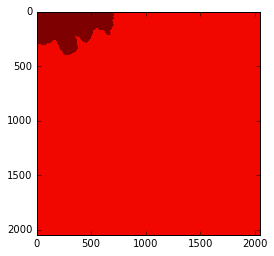

In [30]:
imshow(ws)

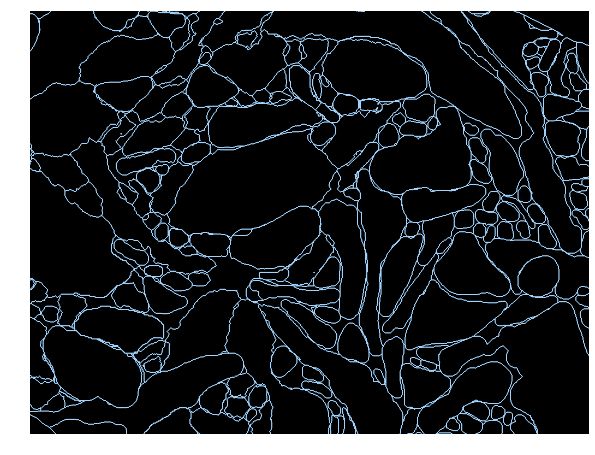

In [39]:
mlp.Util.view(mh.borders(gold[1024:1800,1024:]), large=True)

In [42]:
dilated_borders = mh.borders(gold[1024:1800,1024:])

In [41]:
cut_image = image[1024:1800,1024:]

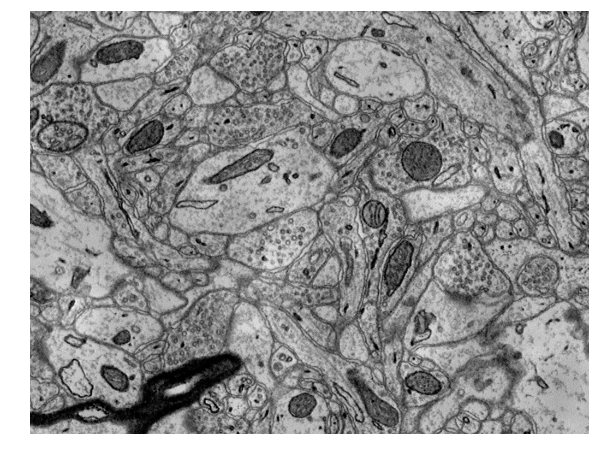

In [40]:
mlp.Util.view(image[1024:1800,1024:], large=True, color=False)

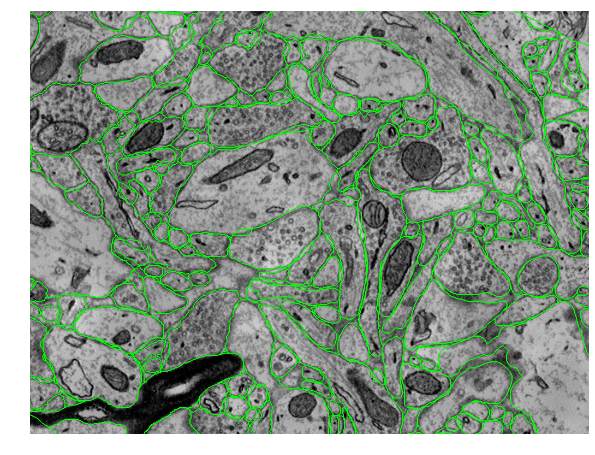

In [44]:
gold_borders_rgb = np.zeros((cut_image.shape[0],cut_image.shape[1],3), dtype=np.uint8)
gold_borders_rgb[:,:,0] = cut_image[:]
gold_borders_rgb[:,:,1] = cut_image[:]
gold_borders_rgb[:,:,2] = cut_image[:]

gold_borders_rgb[dilated_borders==1] = (0,255,0)
mlp.Util.view(gold_borders_rgb, color=False, large=True)

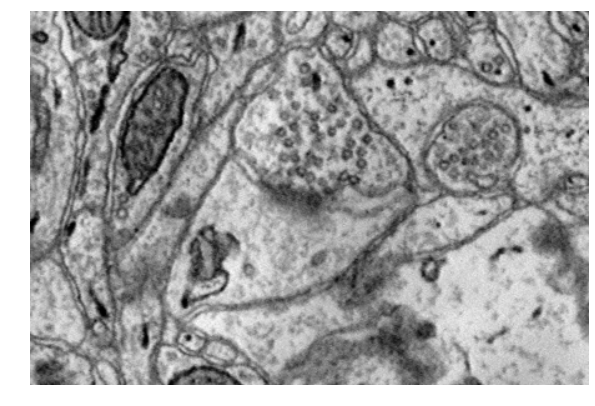

In [47]:
mlp.Util.view(image[1400:1700,1600:], large=True, color=False)